In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from math import pi
get_ipython().magic('matplotlib inline')
fname = 'vgsales.csv'
x1 = pd.read_csv(fname)
"""
tried my best to use all style asserts like docstrings and parameter descriptions. 
used concepts covered in class for parsing the dataframes. 
mainly, functions, loops, classes, dictionaries, tuples, zips, lambda, 
list comprehension, conditionals/if-elif, numpy, various library usages 
(math, matplotlib), collections defaultdict
"""


class Strategies(object):
    """
    author: ester park
    similar to our intervals hw7, i created a class that will accept
    a singular object that will be the dataframe dataset called x1
    return *this, will return self and output a scatter plot of 
    revenue in millions ($ USD million) vs. time (year)
    """
    def __init__(self,x1):
        """
        this will count() method will take in x1 which was the csv file given in week8 
        (not the new one)
        is has to parse the following series columns in order to project sales vs year
        Rank	Name	Platform	Year	Genre	Publisher	NA_Sales	EU_Sales	
        JP_Sales	Other_Sales	Global_Sales
        """
        assert isinstance(x1, pd.core.frame.DataFrame)
        assert 'Year' in x1
        
        yr = x1['Year']
        years = np.unique(x1['Year'][~np.isnan(x1['Year'])]).astype(int)
        NA_Sales = []
        EU_Sales = []
        JP_Sales = []
        Other_Sales = []

        for y in years: 
            NA_Sales.append(np.sum(x1[x1['Year'] == y]['NA_Sales']))
            EU_Sales.append(np.sum(x1[x1['Year'] == y]['EU_Sales']))
            JP_Sales.append(np.sum(x1[x1['Year'] == y]['JP_Sales']))
            Other_Sales.append(np.sum(x1[x1['Year'] == y]['Other_Sales']))

        plt.figure(figsize=(10,5))
        xaxis = range(len(years))
        plt.grid(True)
        plt.plot(NA_Sales, 'bo', label="NA sales")
        plt.plot(EU_Sales, 'ro', label="EU sales")
        plt.plot(JP_Sales, 'go', label="JP sales")
        plt.plot(Other_Sales, 'co', label="other sales")
        plt.ylabel("Sales in millions $")
        plt.legend(loc="upper left")
        plt.xticks(xaxis,years, rotation=70)
        a= plt.show()
        return a
    
class Strategies1(object):
    """
    author: ester park
    similar to our intervals hw7, i created a class that will accept
    a singular object that will be the dataframe dataset called x1
    return *this, will return plot of total revenue vs. number of games sold per company
    this explains the strategy for whether or not a company should invest their efforts
    in creating as many games as possible or specialize
    """
    def __init__(self, x1):
        """
        y axis = revenue in $usd millions
        x axis = number of games sold
        this function will take that same csv file and plot total revenue vs. number of 
        games sold per company the blue dots represent the other comapnies that are 
        part of the lower half of the outliers
        """
        publishers = x1.Publisher.unique()

        data = []

        max_pub = ''
        max_rev = 0 

        max_games_pub = ''
        max_games = 0
        for pub in publishers: 
            x = len(x1[x1['Publisher']==pub])
            y = np.sum(x1[x1['Publisher']==pub]['Global_Sales'])

            data.append((x,y, pub))

            if y > max_rev: 
                max_rev = y
                max_pub = pub

            if x > max_games: 
                max_games = x
                max_games_pub = pub

        plt.figure(figsize=(10,5))
        for x,y,pub in data: 
            if x>600: 
                plt.plot(x,y,'o', label=pub)
            else: 
                plt.plot(x,y,'bo')
        plt.legend(loc="upper left")
        plt.xlabel("Number of games sold")
        plt.ylabel("Total Revenue")
        plt.grid(True)
        return plt.show()
    
class Strategies2(object):
    """
    author: ester park
    """
    def __init__(self, x1): 
        """
        y axis = Revenue
        x axis = number of games sold
        this function will take that same csv file and plot total revenue vs. number 
        of games sold per company however, we also want all the dots, 
        such that ea dot represents the number of games sold that year
        """
        publishers = x1.Publisher.unique()

        data = []


        for pub in publishers: 
            x = len(x1[x1['Publisher']==pub])
            y = np.sum(x1[x1['Publisher']==pub]['Global_Sales'])

            data.append((x,y, pub))


        data.sort(key=lambda tup: tup[1], reverse=True)

        top_10 = [d[2] for d in data[:10]]


        years = np.unique(x1['Year'][~np.isnan(x1['Year'])]).astype(int)

        publisher_data = {}
        for p in top_10: 
            publisher_data[p] = []
            for yr in years: 
                x = len(x1[(x1['Publisher']==p) & (x1['Year']==yr)])
                y = np.sum(x1[(x1['Publisher']==p) & ( x1['Year']==yr)]['Global_Sales'])
                publisher_data[p].append((x,y))



        plt.figure(figsize=(12,10))
        for p in publisher_data:
            x,y = map(list, zip(*publisher_data[p]))
            plt.plot(x,y, 'o', label=p)
        plt.legend(loc="upper left")
        plt.xlabel("Number of games sold")
        plt.ylabel("Total Revenue")
        plt.grid(True)
        return plt.show()
    
class Strategies3(object):
    """
    author: ester park
    will create a bar chart for each top 10 companies, what their avg revenue per year is
    thus signifying that even though nintendo made a lot more money than the rest,
    that on a yearly rate, they dont make the same rate as the other ones on avg
    which can be hurtful for quarterly investments/dividends
    """
    def __init__(self, x1): 
        publishers = x1.Publisher.unique()

        data = []


        for pub in publishers: 
            x = len(x1[x1['Publisher']==pub])
            y = np.sum(x1[x1['Publisher']==pub]['Global_Sales'])

            data.append((x,y, pub))


        data.sort(key=lambda tup: tup[1], reverse=True)

        top_10 = [d[2] for d in data[:10]]


        years = np.unique(x1['Year'][~np.isnan(x1['Year'])]).astype(int)

        publisher_data = {}
        for p in top_10: 
            publisher_data[p] = []
            for yr in years: 
                #x = len(x1[(x1['Publisher']==p) & (x1['Year']==yr)])
                yearly_revenue = np.sum(x1[(x1['Publisher']==p) & ( x1['Year']==yr)]['Global_Sales'])
                publisher_data[p].append(yearly_revenue)

        data = [publisher_data[p] for p in top_10]

        plt.figure(figsize=(8,10))
        plt.boxplot(data)
        plt.xticks(np.array(range(len(top_10)))+1,top_10, rotation=90)
        plt.xlabel("Top 10 Companies")
        plt.ylabel("Yearly Global Revenue in millions $")
        plt.title('Yearly Global Revenue for Top 10 Companies')
        return plt.show()

class Strategies4(object):
    """
    author: ester park
    this was a radar chart example that i used from 
    https://python-graph-gallery.com/390-basic-radar-chart/
    https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
    just testing it out here
    """
    def __init__(self, x1):
        df = pd.DataFrame({
        'group': ['A','B','C','D'],
        'var1': [38, 1.5, 30, 4],
        'var2': [29, 10, 9, 34],
        'var3': [8, 39, 23, 24],
        'var4': [7, 31, 33, 14],
        'var5': [28, 15, 32, 14]
        })

        # number of variable
        categories=list(df)[1:]
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values=df.loc[0].drop('group').values.flatten().tolist()
        values += values[:1]
        values

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories, color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
        plt.ylim(0,40)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)
        return plt.show()
    
class Strategies5(object):
    """
    author: ester park
    now for the actual radar, i want to add the data frames into the areas
    https://python-graph-gallery.com/390-basic-radar-chart/
    https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
    just testing it out here
    """
    def __init__(self, x1):
        assert isinstance(x1, pd.core.frame.DataFrame)
        assert 'Year' in x1

        #need a dictionary key pair for the various game consoles and their number of games sold
        platforms = np.unique(x1['Platform'])
        genres = np.unique(x1['Genre'])
        platform_genres_rev = {}
        plt_counts = []
        for p in platforms: 
            count = len(x1[x1['Platform'] == p])
            #print('{} = {}'.format(p, count))
            plt_counts.append((p, count))
            platform_genres_rev[p] = []
            for g in genres: 
                rev = np.sum(x1[(x1['Platform'] == p) & (x1['Genre'] == g)]['Global_Sales'])
                platform_genres_rev[p].append(rev)
        plt_counts.sort(key= lambda tup:tup[1], reverse=True)
        print(plt_counts)
        print(platform_genres_rev['DS'])
        
        
        platform_revs = []
        for pl, revs in platform_genres_rev.items(): 
            platform_revs.append((pl,np.sum(revs)))
    
        platform_revs.sort(key = lambda tup:tup[1], reverse=True)
        print(platform_revs)
        
        # ------- PART 1: Create background
        # number of games sold radar chart
        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        
        # Initialise the spider plot
        plt.figure(figsize=(10,10))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(10,250,40)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,250)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['DS'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="DS")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS2'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS2")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS3'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS3")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 3 by # of games", y=1.08)
        plt.show()


        # ------- PART 1: Create background
        # num games sold 4-6 radar
        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(10,250,40)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,250)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['Wii'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="Wii")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['X360'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="X360")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PSP'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PSP")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 4-6 by # of games", y=1.08)

        plt.show()


        # ------- PART 1: Create background
         #num games sold 7-9/genre
        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(10,250,40)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,250)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PC'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PC")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['XB'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="XB")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 7-9 by # of games", y=1.08)

        plt.show()

        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(0,300,50)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,300)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS2'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS2")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['X360'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="X360")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS3'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS3")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 1-3 by sales", y=1.08)

        plt.show()


        #amt of sales/genre/platform
        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(0,300,50)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,300)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['Wii'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="Wii")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['DS'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="DS")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 4-6 by sales", y=1.08)

        plt.show()



         #amt of sales/genre/platform
        # number of variable
        #categories=list(df)[1:]
        categories = np.unique(x1['Genre'])
        N = len(categories)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)

        # Draw ylabels
        ax.set_rlabel_position(0)
        y_ticks = np.array(list(range(0,300,50)))

        plt.yticks(y_ticks, y_ticks.astype('str'), color="grey", size=15)
        plt.ylim(0,300)


        # ------- PART 2: Add plots

        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

        # Ind1
        #values=df.loc[0].drop('group').values.flatten().tolist()
        values = platform_genres_rev['GBA'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="GBA")
        ax.fill(angles, values, 'b', alpha=0.1)

        # Ind2
        #values=df.loc[1].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PSP'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PSP")
        ax.fill(angles, values, 'r', alpha=0.1)


        #values=df.loc[2].drop('group').values.flatten().tolist()
        values = platform_genres_rev['PS4'].copy()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label="PS4")
        ax.fill(angles, values, 'y', alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title("Top 7-9 by sales", y=1.08)

        return plt.show()

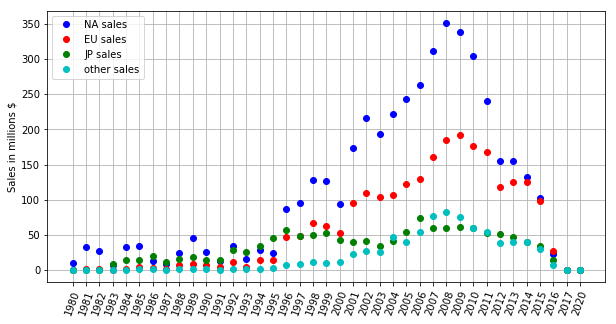

In [4]:
Strategies(x1)
# slide 4 was converted into a bar graph as instructed by matt. 
#Regional Economic Constraints show in Total sales in millions vs. Time
# introduce how the strategies were tailored by geographical biases
# that cannot be applied to other regions

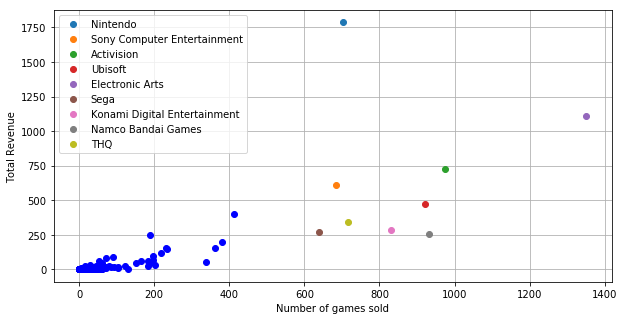

In [5]:
Strategies1(x1)
# slide 12, scatter plot for total sales
# It is better to specialize rather than brute-force release volumously

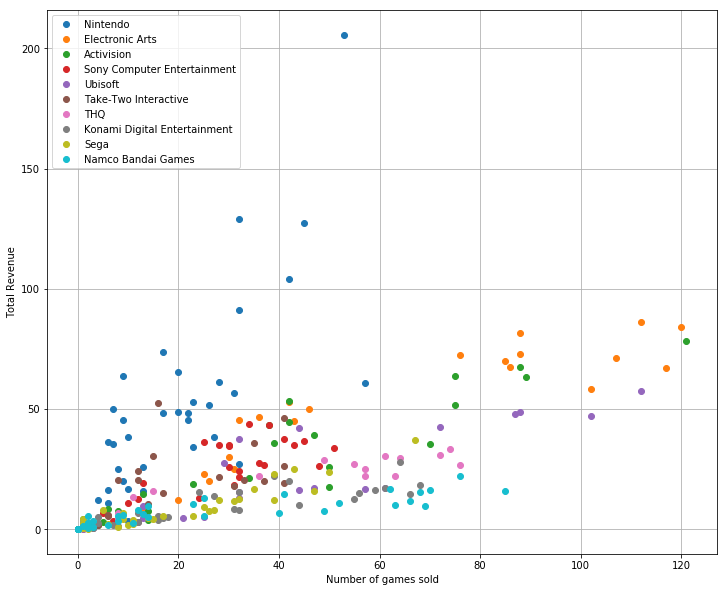

In [6]:
Strategies2(x1)
# slide 12, scatter plot for not total sales, but this time yearly sales per dot
#It is better to specialize rather than brute-force release volumously
# scatter plot to show you a positive correlation 

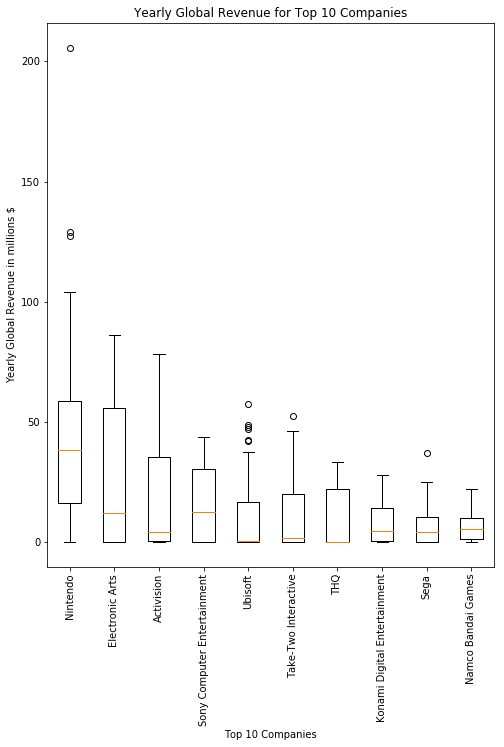

In [7]:
Strategies3(x1)
# slide 13, normalized box and whisker plot that shows yearly rate 
# is not the same as overall gains 


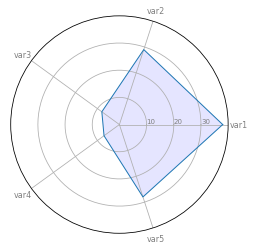

In [8]:
Strategies4(x1)
# honestly this radar chart was so hard to do, but the skeleton was taken from 
#https://python-graph-gallery.com/390-basic-radar-chart/
#https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

[('DS', 2163), ('PS2', 2161), ('PS3', 1329), ('Wii', 1325), ('X360', 1265), ('PSP', 1213), ('PS', 1196), ('PC', 960), ('XB', 824), ('GBA', 822), ('GC', 556), ('3DS', 509), ('PSV', 413), ('PS4', 336), ('N64', 319), ('SNES', 239), ('XOne', 213), ('SAT', 173), ('WiiU', 143), ('2600', 133), ('GB', 98), ('NES', 98), ('DC', 52), ('GEN', 27), ('NG', 12), ('SCD', 6), ('WS', 6), ('3DO', 3), ('TG16', 2), ('GG', 1), ('PCFX', 1)]
[115.55999999999995, 47.290000000000035, 7.199999999999999, 137.76000000000028, 77.44999999999993, 84.29000000000002, 38.640000000000015, 126.85000000000011, 8.199999999999996, 132.03000000000026, 31.830000000000005, 15.389999999999999]
[('PS2', 1255.6399999999994), ('X360', 979.96000000000015), ('PS3', 957.83999999999946), ('Wii', 926.70999999999981), ('DS', 822.49000000000069), ('PS', 730.65999999999997), ('GBA', 318.50000000000006), ('PSP', 296.28000000000003), ('PS4', 278.10000000000008), ('PC', 258.82000000000016), ('XB', 258.2600000000001), ('GB', 255.45000000000005

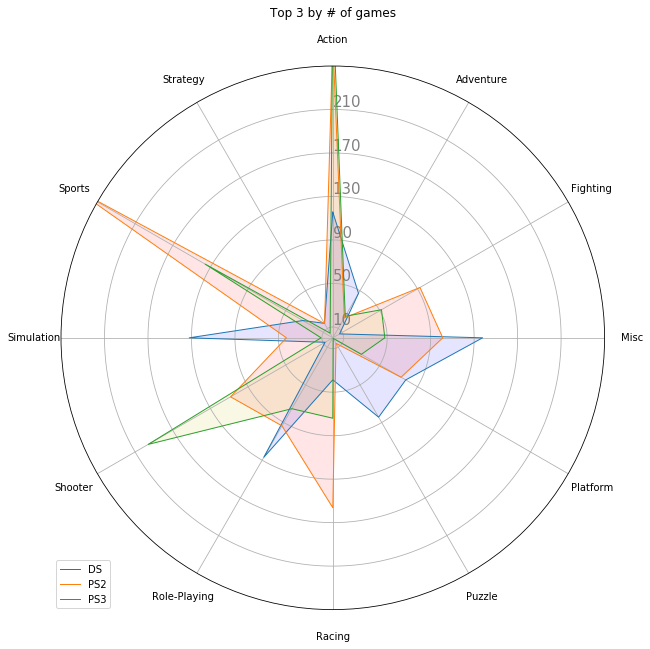

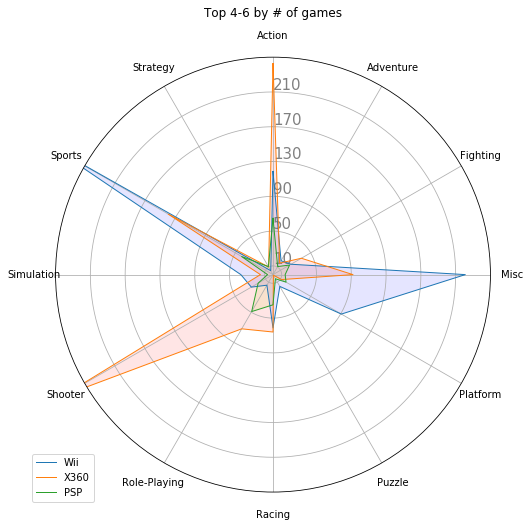

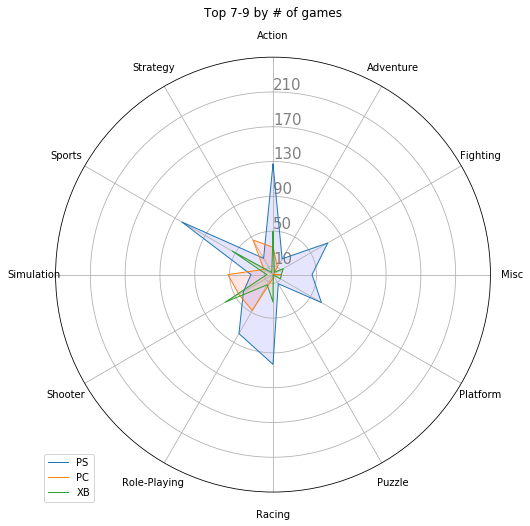

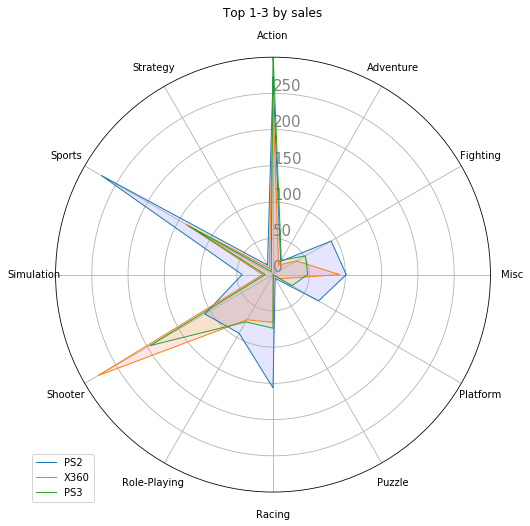

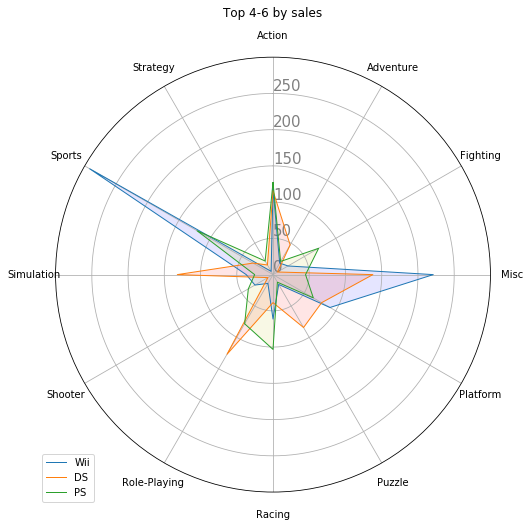

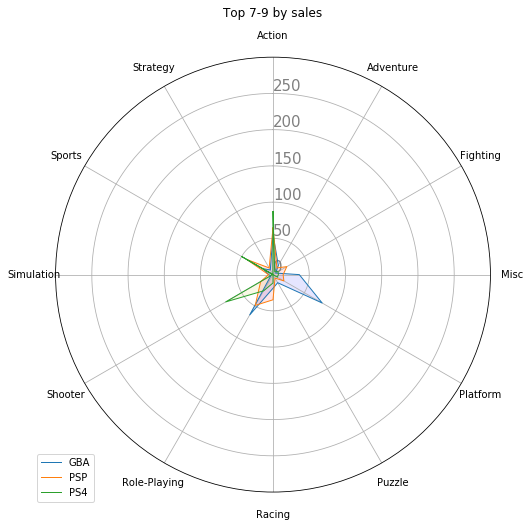

In [9]:
Strategies5(x1)
# slide 5, these radar charts were taken and turned into bar-and-graph charts as instructed by matt
